In [745]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 3PCF

### Load data from pynpcf

In [746]:
d = np.load('/home/ophilcox/pynpcf/outputs/test100_3PCF_n6.npz')
r1,r2 = d.f.bin_centers.T
zeta3py = d.f.zeta
d.close()

### Load data from NPCF-Estimator

In [747]:
bin1,bin2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_3pcf.txt',skiprows=4,max_rows=2).astype(int)
d2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_3pcf.txt',skiprows=7)
ells = d2[:,0].astype(int)
zeta3cpp = d2[:,1:]

### Plot

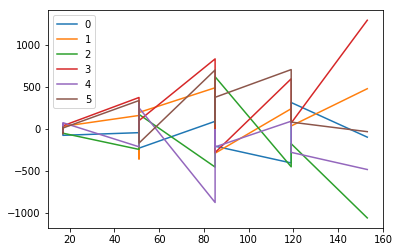

In [748]:
for ell in ells:
    plt.plot(r1,zeta3py[ell],label=ell);
plt.legend();
#plt.yscale('log')
#plt.ylim([-2000,2000])
#plt.ylim([-200000,200000])

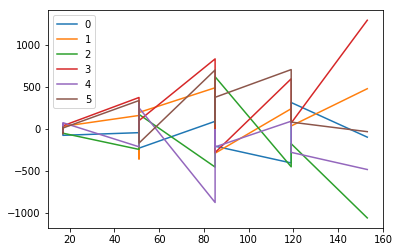

In [749]:
for ell in ells:
    plt.plot(r1,zeta3cpp[ell],label=ell);
plt.legend();

In [750]:
n_bin = len(np.unique(r1))
n_ell = len(ells)
zeta3py_mat = np.zeros((len(ells),n_bin,n_bin))
zeta3cpp_mat = np.zeros((len(ells),n_bin,n_bin))
for ell in range(n_ell):
    i = 0
    for i in range(len(bin1)):
        zeta3py_mat[ell,bin1[i],bin2[i]] = zeta3py[ell,i]
        zeta3cpp_mat[ell,bin1[i],bin2[i]] = zeta3cpp[ell,i]

/home/ophilcox/.conda/envs/ptenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


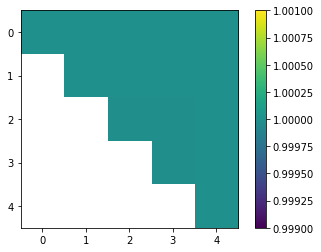

In [751]:
ell = 5
plt.imshow(zeta3py_mat[ell]/zeta3cpp_mat[ell],vmax=1.001,vmin=0.999)
plt.colorbar();

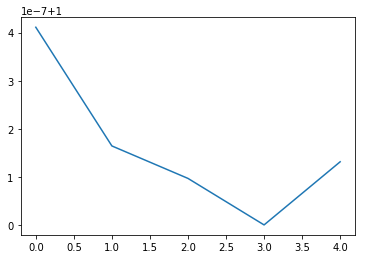

In [752]:
ell = 5
i = np.unique(bin2)[-1]
plt.plot(bin1[bin2==i],zeta3py[ell][bin2==i]/zeta3cpp[ell][bin2==i])

# 4PCF

### Load data from pynpcf

In [1026]:
n_ell = 6
d = np.load('/home/ophilcox/pynpcf/outputs/test100orig_4PCF_n%d.npz'%n_ell)
r1,r2,r3 = d.f.bin_centers.T
zeta4py = d.f.zeta
d.close()

In [1027]:
# zeta4py_old = zeta4py.copy()

### Load data from NPCF-Estimator

In [1028]:
bin1,bin2,bin3 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_4pcf.txt',skiprows=4,max_rows=3).astype(int)
d2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_4pcf.txt',skiprows=8)
ell1 = d2[:,0].astype(int)
ell2 = d2[:,1].astype(int)
ell3 = d2[:,2].astype(int)
zeta4cpp_inp = d2[:,3:]
zeta4cpp = np.zeros_like(zeta4py)

# rebin to match python output
for i in range(len(zeta4cpp_inp)):
    #print("%d (%d,%d,%d)"%(i,ell1[i],ell2[i],ell3[i]))
    zeta4cpp[ell1[i],ell2[i],ell3[i]] = zeta4cpp_inp[i]

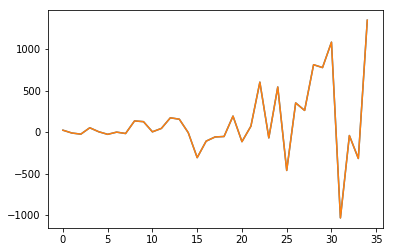

In [1029]:
l1 = 2
l2 = 3
l3 = 3
plt.plot(zeta4cpp[l1,l2,l3])
plt.plot(zeta4py[l1,l2,l3])

In [1032]:
for i in range(len(ell1)):
    l1,l2,l3 = ell1[i],ell2[i],ell3[i]
    ratio = zeta4cpp[l1,l2,l3]/zeta4py[l1,l2,l3]
    print(l1,l2,l3,ratio.mean())
    if np.std(ratio)>1e-6:
        plt.figure()
        plt.plot(ratio)
        plt.title("%d,%d,%d"%(l1,l2,l3))

(0, 0, 0, 1.0000000335725072)
(0, 1, 1, 1.0000000194418976)
(0, 2, 2, 0.999999979930517)
(0, 3, 3, 0.99999997227957)
(0, 4, 4, 0.9999999648832741)
(0, 5, 5, 0.9999999867742417)
(1, 0, 1, 1.0000000394407704)
(1, 1, 0, 0.9999999858476404)
(1, 1, 2, 1.0000000096628154)
(1, 2, 1, 0.9999999794552061)
(1, 2, 3, 1.0000000107467117)
(1, 3, 2, 1.0000000037064483)
(1, 3, 4, 1.0000000165653031)
(1, 4, 3, 1.0000000021721676)
(1, 4, 5, 1.0000000139675227)
(1, 5, 4, 1.000000035110522)
(2, 0, 2, 0.9999999869354996)
(2, 1, 1, 0.9999999954640089)
(2, 1, 3, 0.9999999968736536)
(2, 2, 0, 0.9999999611890408)
(2, 2, 2, 0.9999999824203132)
(2, 2, 4, 1.0000000012924737)
(2, 3, 1, 0.9999999869343061)
(2, 3, 3, 1.0000000003689944)
(2, 3, 5, 1.000000041282328)
(2, 4, 2, 0.9999999789094409)
(2, 4, 4, 1.0000000123167265)
(2, 5, 3, 1.0000000096277875)
(2, 5, 5, 0.9999999970174547)
(3, 0, 3, 1.0000000113197816)
(3, 1, 2, 1.0000000087047172)
(3, 1, 4, 1.0000000506071398)
(3, 2, 1, 0.9999999793849444)
(3, 2, 3, 0.999